In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('/content/Bank_data.csv')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [7]:
data.shape

(45211, 17)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
numeric_columns = data.select_dtypes(include='number')

column_with_outliers = []

for col in numeric_columns:
    Q1 = numeric_columns[col].quantile(0.25)
    Q3 = numeric_columns[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper=  Q3 + 1.5 * IQR

    if ((numeric_columns[col] < lower) | (numeric_columns[col] > upper)).any:
        column_with_outliers.append(col)

for col in column_with_outliers:
  print(col)

age
balance
day
duration
campaign
pdays
previous


In [12]:
skew1 = data[numeric_columns.columns].skew()
skew1

,0
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [13]:
#Solve outliers problems with clip values methods

for col in column_with_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside bounds
    data[col] = np.clip(data[col], lower, upper)

In [14]:
import numpy as np
import pandas as pd
from scipy import stats

threshold = 3


for col in column_with_outliers:
    if data[col].dtype in ['float64', 'int64']:
        z_scores_after = stats.zscore(data[col].dropna())

        outliers_after = np.abs(z_scores_after) > threshold
        print(f"Outliers in {col} after handling: {np.sum(outliers_after)}")


Outliers in age after handling: 0
Outliers in balance after handling: 0
Outliers in day after handling: 0
Outliers in duration after handling: 0
Outliers in campaign after handling: 0
Outliers in pdays after handling: 0
Outliers in previous after handling: 0


<ipython-input-14-367bacb7a8b9>:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores_after = stats.zscore(data[col].dropna())


In [15]:
data.nunique()

,0
age,54
job,12
marital,3
education,4
default,2
balance,4163
housing,2
loan,2
contact,3
day,31


In [16]:
for col in data[numeric_columns.columns]:
  if data[col].nunique() == 1:
    data.drop(columns=[col], inplace=True)

In [17]:
data.nunique()

,0
age,54
job,12
marital,3
education,4
default,2
balance,4163
housing,2
loan,2
contact,3
day,31


In [18]:
data.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,unknown,no
6,28.0,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,unknown,no
8,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,unknown,no
9,43.0,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,unknown,no


In [19]:
skew = numeric_columns.skew()
skew

,0
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


<Axes: >

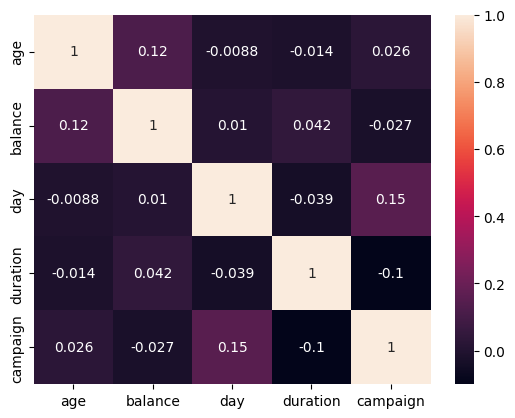

In [20]:
import seaborn as sns
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)

In [21]:
data.dtypes

,0
age,float64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline  # Use ImbPipeline for handling SMOTE/oversampling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline


numeric_features = make_column_selector(dtype_include='number')
cat_features = make_column_selector(dtype_include='object')

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categoric_transformer, cat_features)
    ]
)


model = RandomForestClassifier()

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', RandomOverSampler(random_state=42)),
    ('model', model)
])

X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print(f"Pipeline score (Accuracy on test set): {pipeline.score(X_test, y_test)}")


Accuracy: 0.9036538971954349
Precision: 0.8989514251240516
Recall: 0.9036538971954349
F1-Score: 0.9009887376641468
Pipeline score (Accuracy on test set): 0.9036538971954349


In [26]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(random_state=42)

pipeline2 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', RandomOverSampler(random_state=42)),
    ('model', model2)
])

pipeline.fit(X_train, y_train)

y_pred1 = pipeline.predict(X_test)

In [27]:

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print(f"Pipeline score (Accuracy on test set): {pipeline.score(X_test, y_test)}")


Accuracy: 0.9017959833672476
Precision: 0.8965507360417587
Recall: 0.9017959833672476
F1-Score: 0.8987989674316212
Pipeline score (Accuracy on test set): 0.9017959833672476


In [29]:
from sklearn.svm import SVC

model3 = SVC(random_state=42, probability=True)


pipeline2 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', RandomOverSampler(random_state=42)),
    ('model', model3)
])

pipeline.fit(X_train, y_train)

y_pred2 = pipeline.predict(X_test)

In [30]:

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print(f"Pipeline score (Accuracy on test set): {pipeline.score(X_test, y_test)}")


Accuracy: 0.9018844554543042
Precision: 0.8966165056067742
Recall: 0.9018844554543042
F1-Score: 0.898871320367235
Pipeline score (Accuracy on test set): 0.9018844554543042


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)

pipeline2 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', RandomOverSampler(random_state=42)),
    ('model', model_gb)
])

pipeline.fit(X_train, y_train)

y_pred3 = pipeline.predict(X_test)

In [32]:

accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print(f"Pipeline score (Accuracy on test set): {pipeline.score(X_test, y_test)}")


Accuracy: 0.9030345925860391
Precision: 0.897205256519552
Recall: 0.9030345925860391
F1-Score: 0.8996242138711967
Pipeline score (Accuracy on test set): 0.9030345925860391
